In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os


PATH = 'results_50'
df_cultura = pd.read_csv(PATH + "/raw_results.csv", index_col = [0])
df_cultura['N_est'] = df_cultura['f0'] + df_cultura['f1'] + df_cultura['f2']# plus the individual
df_cultura = df_cultura.groupby(['region_name', 'decade']).agg({'N_est': 'sum', 'individual_wikidata_id':'count'}).reset_index()
df_cultura = df_cultura.rename(columns={"individual_wikidata_id": "score"})

df_cultura['survival_ratio']=df_cultura['score']/df_cultura['N_est']

### Unique plot

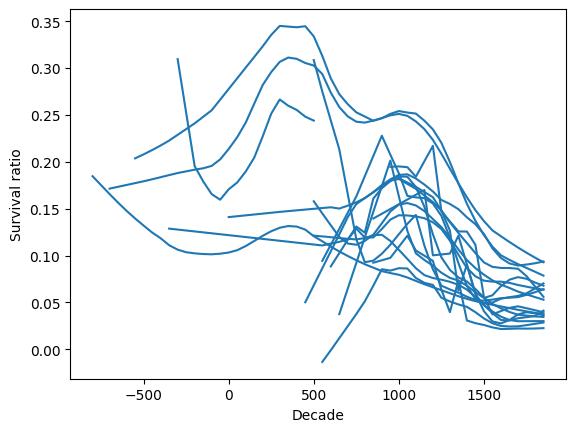

In [43]:
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Grouping by region_name
grouped = df_cultura.groupby('region_name')

# Creating a figure and axis
fig, ax1 = plt.subplots()

# Plotting for each group
for name, group in grouped:
    # Calculating LOESS curve
    smoothed = lowess(group['survival_ratio'], group['decade'], frac=0.3)

    # Plotting survival ratio on the left y-axis
    color = 'tab:blue'
    ax1.plot(group['decade'], smoothed[:, 1], color=color)

# Setting labels
ax1.set_xlabel('Decade')
ax1.set_ylabel('Survival ratio')

# Displaying the plot
plt.show()


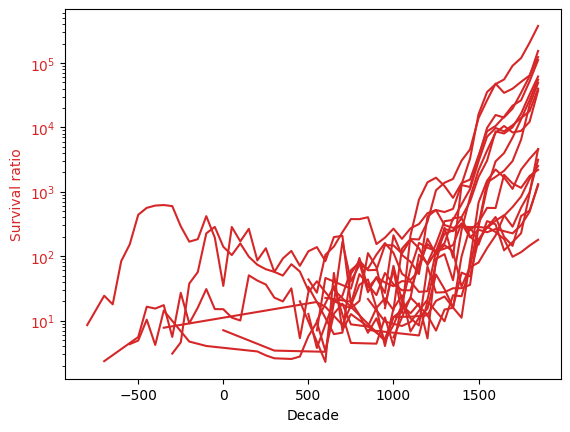

In [44]:
# Grouping by region_name
grouped = df_cultura.groupby('region_name')

# Creating a figure and axis
fig, ax2 = plt.subplots()

# Plotting for each group
for name, group in grouped:
    # Calculating LOESS curve
    smoothed = lowess(group['survival_ratio'], group['decade'], frac=0.3)

    # Plotting survival ratio on the left y-axis
    color = 'tab:red'
    ax2.set_ylabel('Log Corrected Index', color=color)  # We already handled the x-label with ax1
    ax2.plot(group['decade'], group['N_est'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_yscale('log')
# Setting labels
ax2.set_xlabel('Decade')
ax2.set_ylabel('Survival ratio')

# Displaying the plot
plt.show()

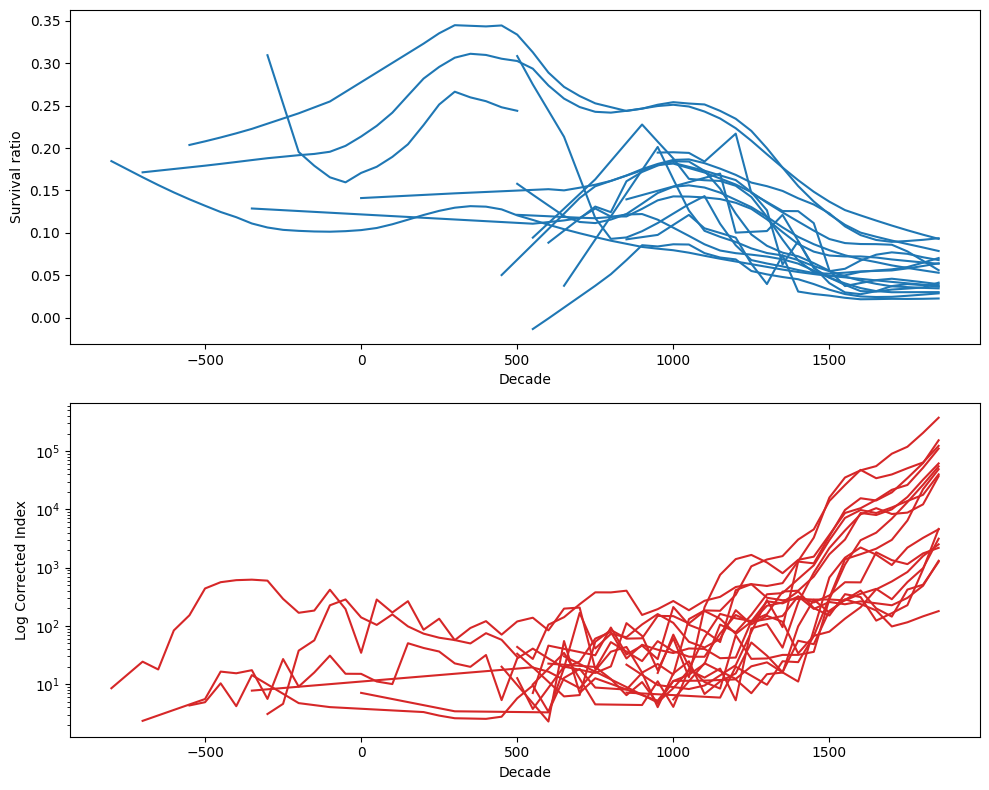

In [45]:
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Grouping by region_name
grouped = df_cultura.groupby('region_name')

# Creating a figure and axis with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plotting for each group
for name, group in grouped:
    # Calculating LOESS curve
    smoothed = lowess(group['survival_ratio'], group['decade'], frac=0.3)

    # Plotting survival ratio on the left y-axis
    color = 'tab:blue'
    ax1.plot(group['decade'], smoothed[:, 1], color=color)
    
    # Plotting N_est on the right y-axis
    color = 'tab:red'
    ax2.plot(group['decade'], group['N_est'], color=color)
    ax2.set_yscale('log')

# Setting labels for the first subplot
ax1.set_xlabel('Decade')
ax1.set_ylabel('Survival ratio')

# Setting labels for the second subplot
ax2.set_xlabel('Decade')
ax2.set_ylabel('Log Corrected Index')

# Adjust layout
plt.tight_layout()

# Displaying the plot
plt.show()


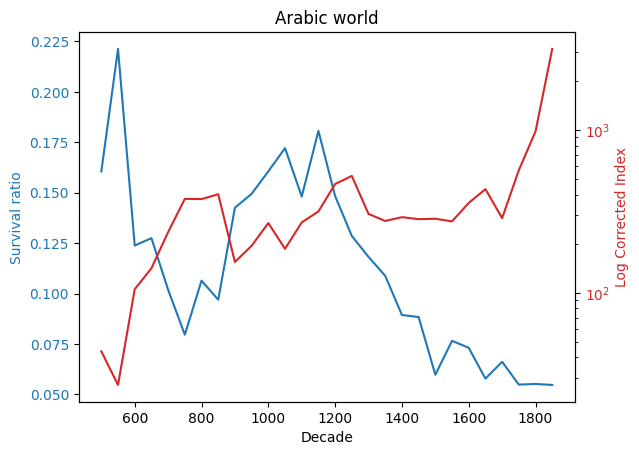

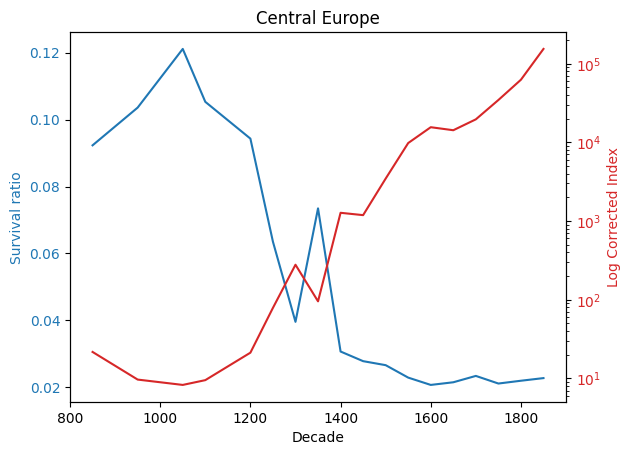

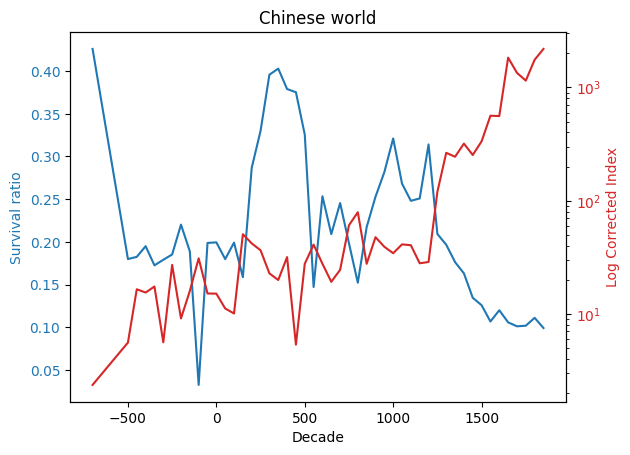

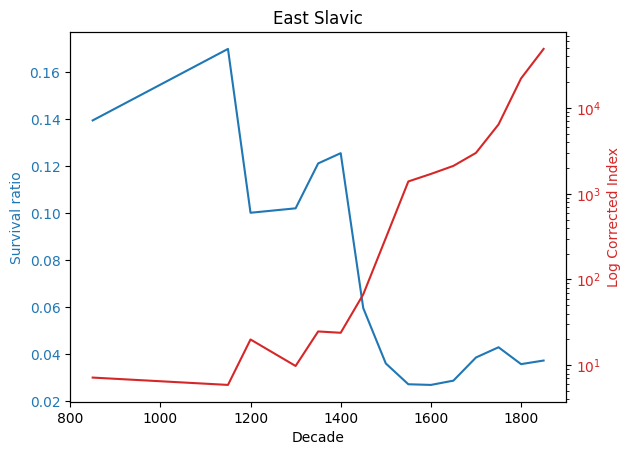

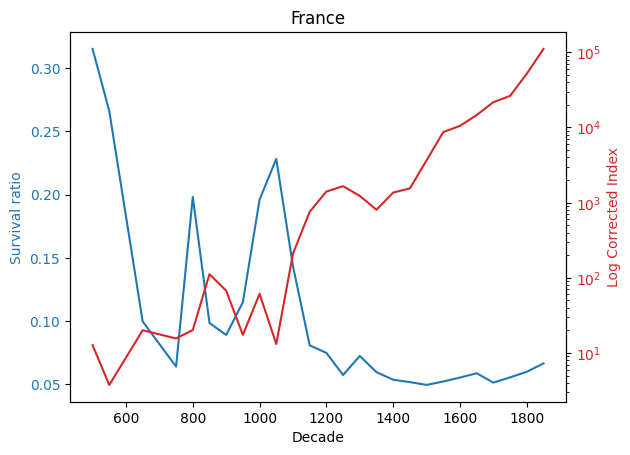

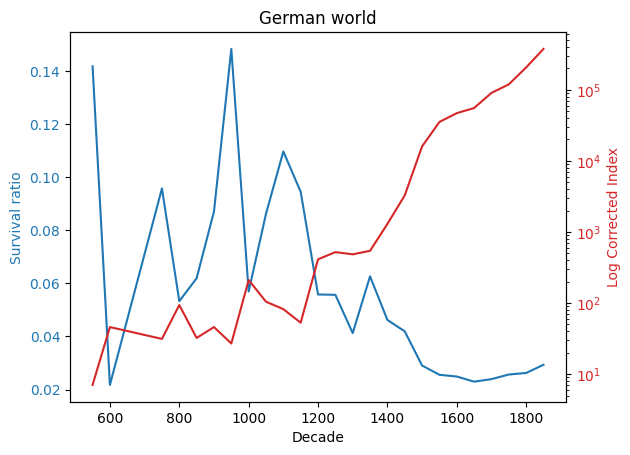

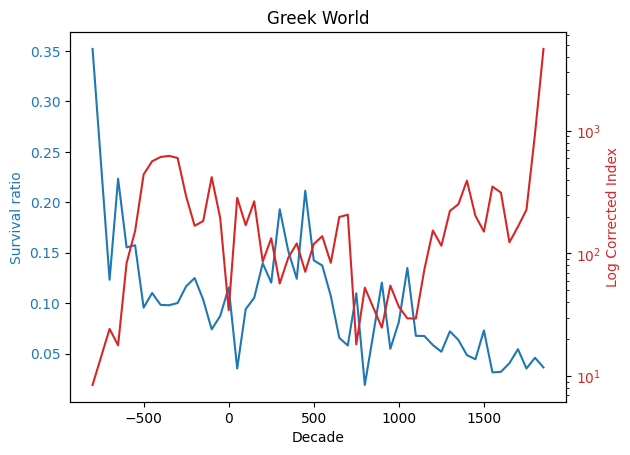

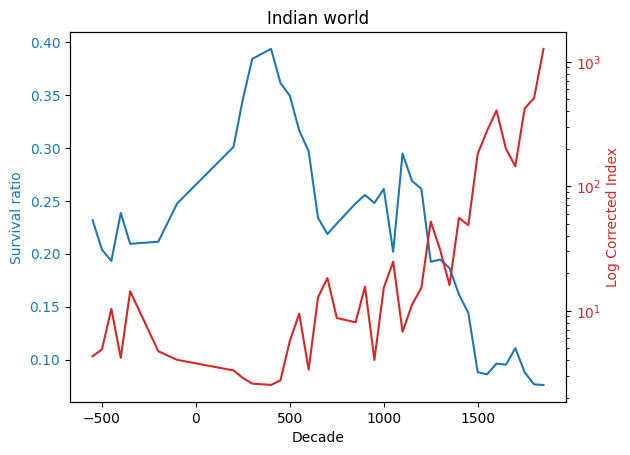

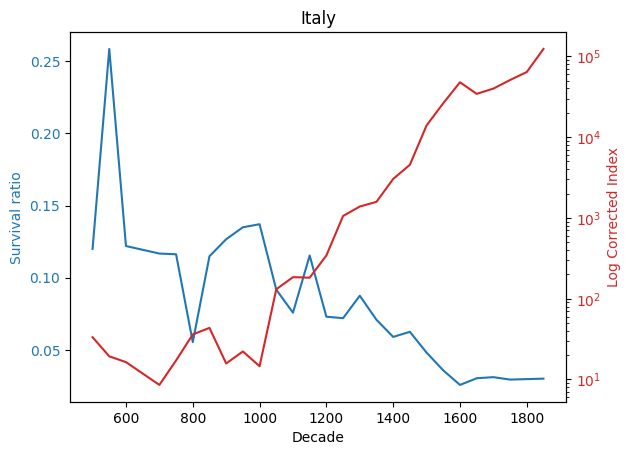

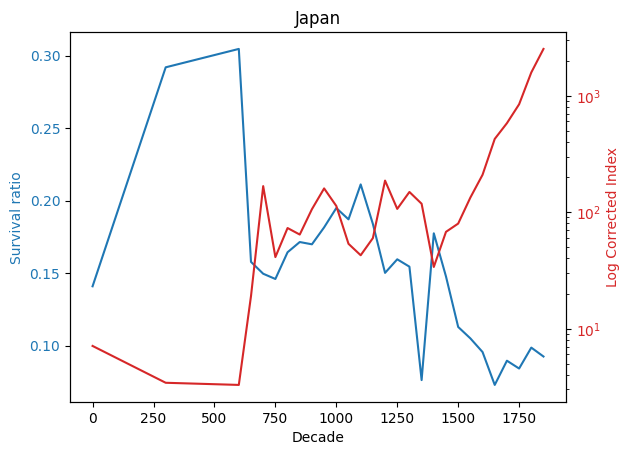

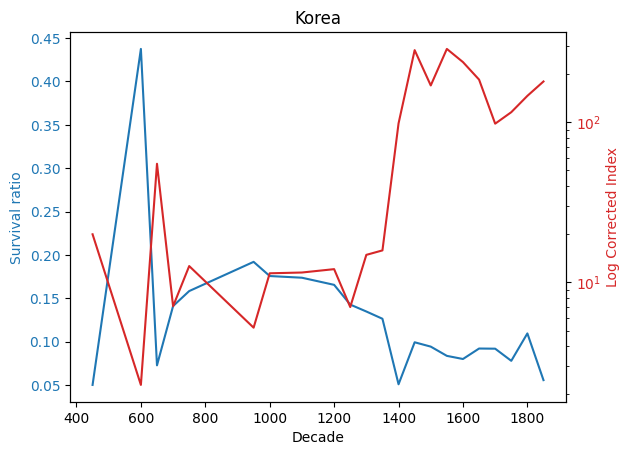

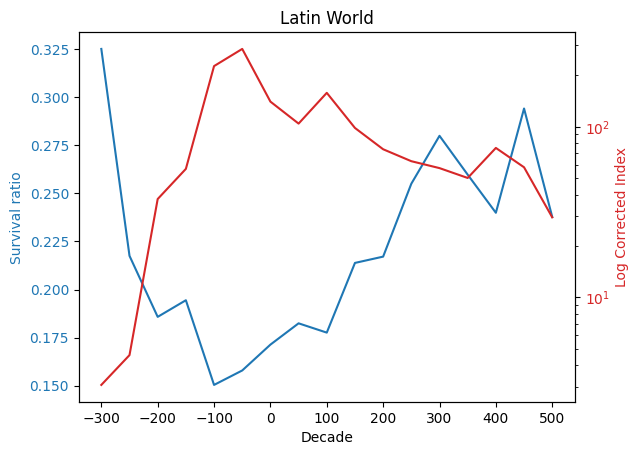

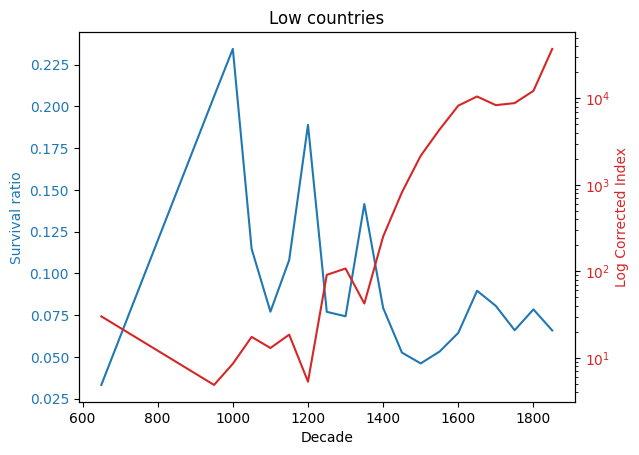

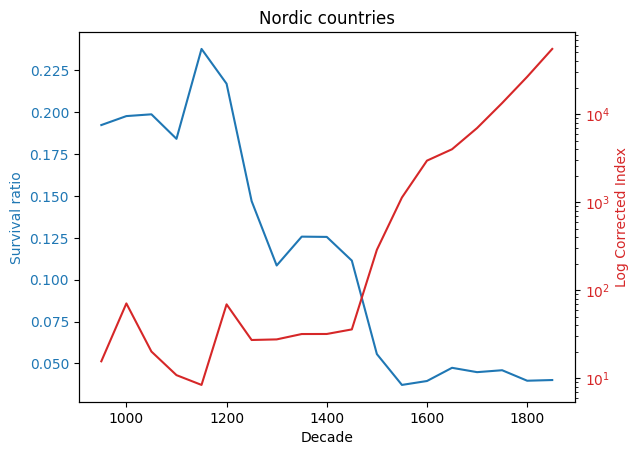

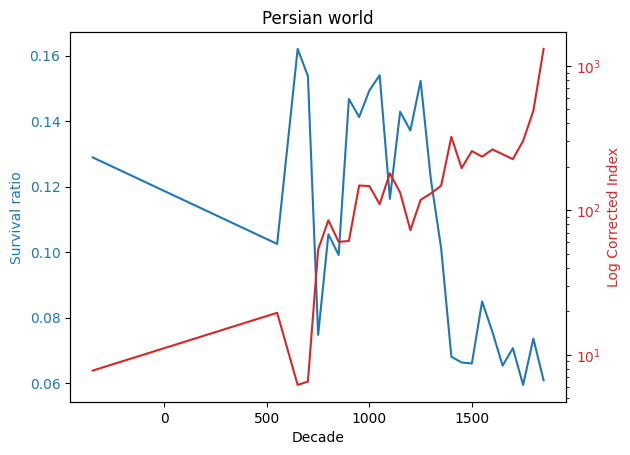

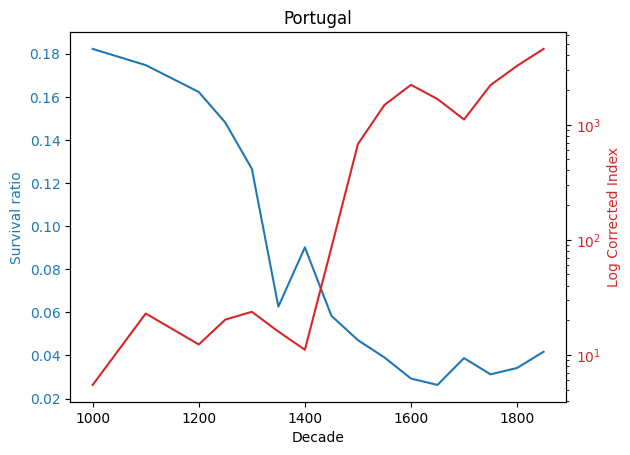

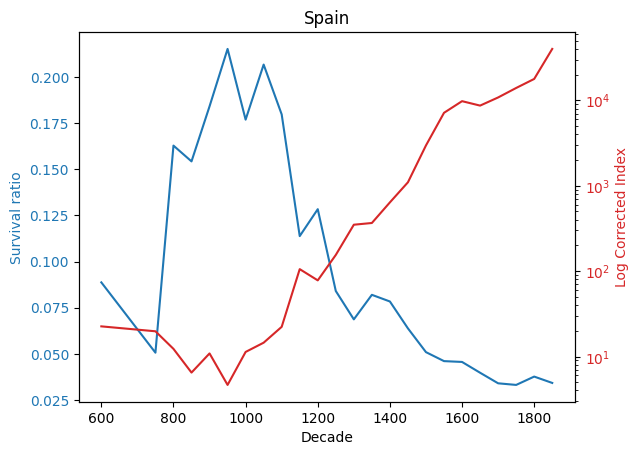

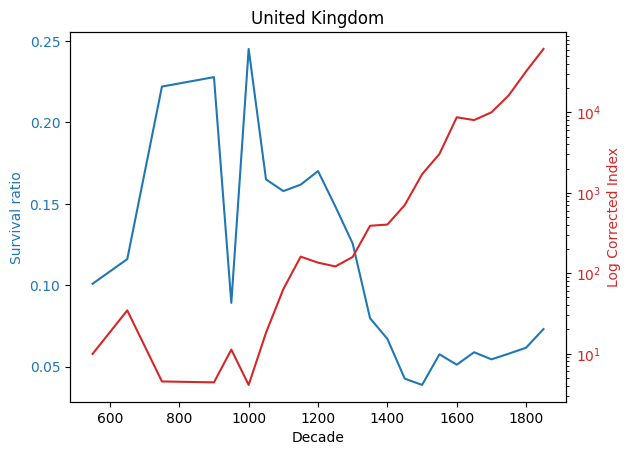

In [10]:



show = True

# Create the directory if it doesn't exist
directory = "survival_ratio_plots"
if not os.path.exists(directory):
    os.makedirs(directory)
    

grouped = df_cultura.groupby('region_name')

for name, group in grouped:
    fig, ax1 = plt.subplots()  # Create a figure and an axis

    # Plotting the survival ratio on the left y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Decade')
    ax1.set_ylabel('Survival ratio', color=color)
    ax1.plot(group['decade'], group['survival_ratio'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a second y-axis for the corrected index
    ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
    color = 'tab:red'
    ax2.set_ylabel('Log Corrected Index', color=color)  # We already handled the x-label with ax1
    ax2.plot(group['decade'], group['N_est'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_yscale('log')

    plt.title(name)

    # Save the plot to a file
    plt.savefig(os.path.join(directory, f'{name}.png'))
    # Show plot
    if show:
        plt.show()
    plt.close(fig)  #